Total Global Pixels 24091167

Latitude Band: (30-60)N-(30-60)S
Value Range: (0, 30)
Valid Pixels: 8813436
Fraction Valid wrt local region: 0.9705368059499233
Fraction Valid wrt global region: 0.36583682309785986
Mean: 12.119795799255371
Standard Deviation: 6.737338542938232
50th Percentile: 11.630000114440918
80th Percentile: 18.184999465942383
90th Percentile: 21.654998779296875


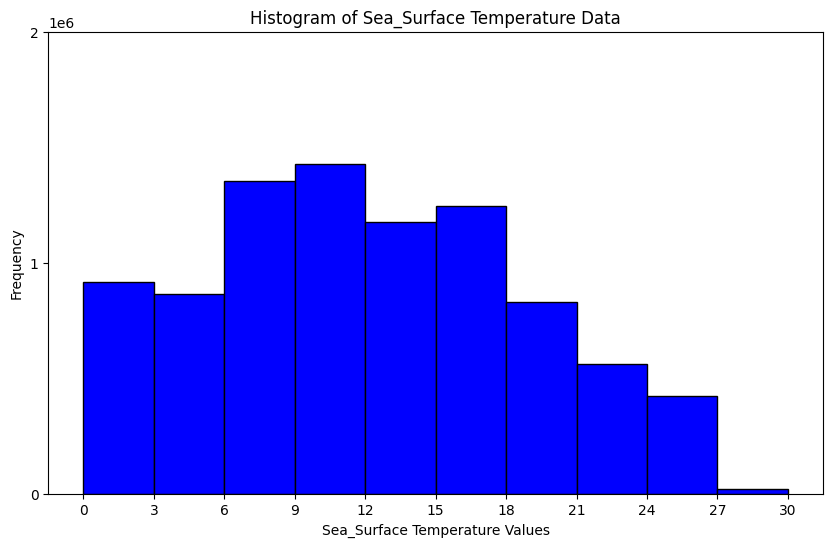

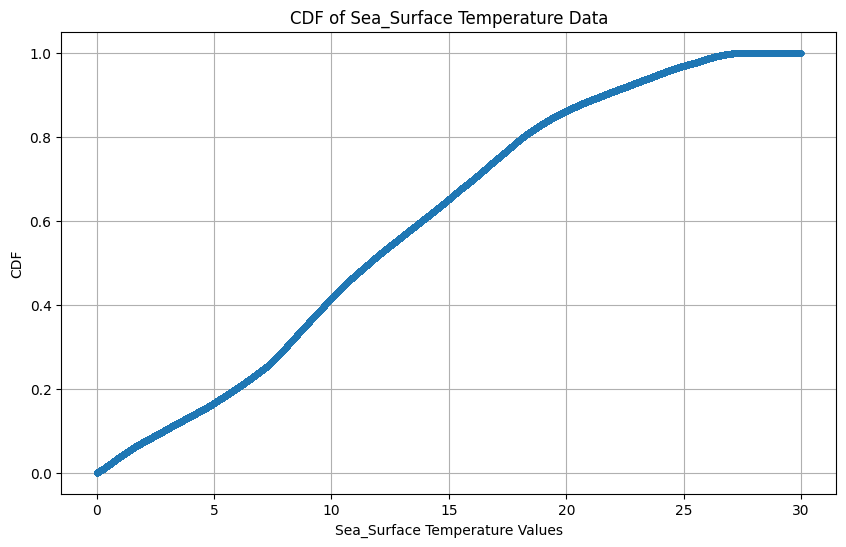


Latitude Band: (30-60)N-(30-60)S
Value Range: (0, 60)
Valid Pixels: 8817726
Fraction Valid wrt local region: 0.971009221350401
Fraction Valid wrt global region: 0.3660148966631629
Mean: 12.129578590393066
Standard Deviation: 6.750452518463135
50th Percentile: 11.63499927520752
80th Percentile: 18.19499969482422
90th Percentile: 21.674999237060547


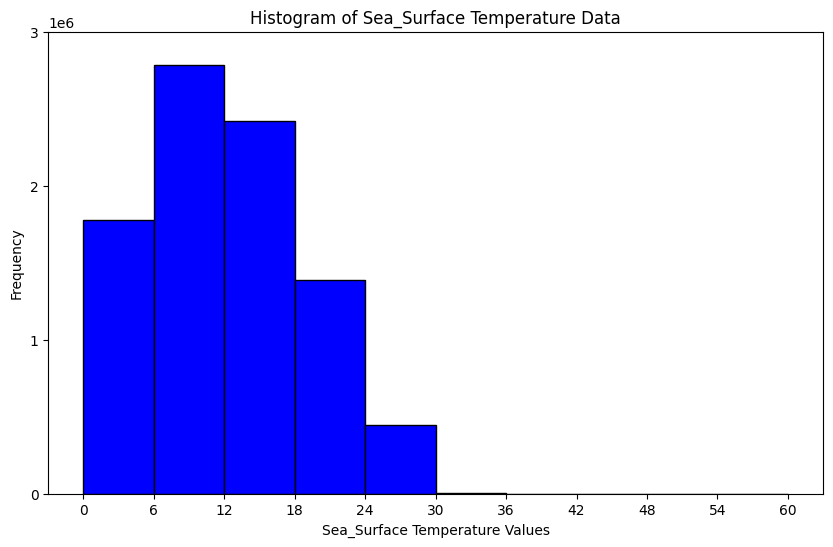

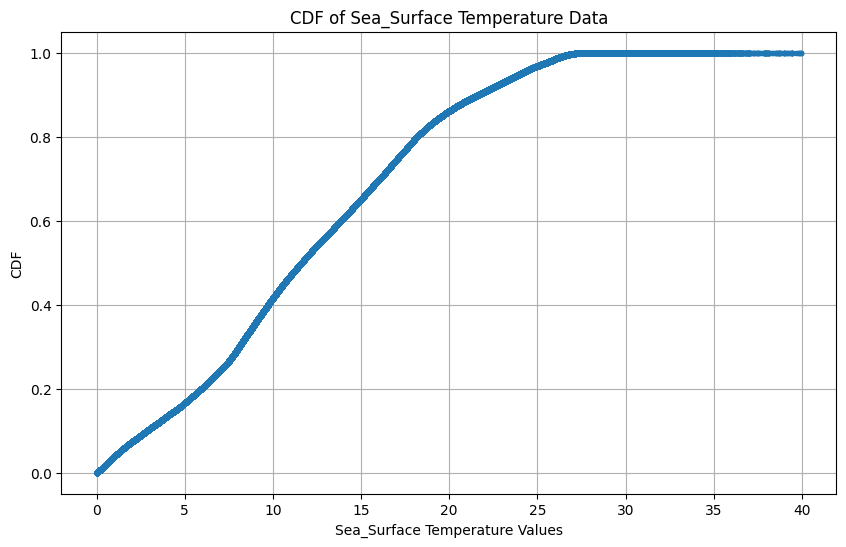


Latitude Band: (30-60)N-(30-60)S
Value Range: (0, 90)
Valid Pixels: 8817726
Fraction Valid wrt local region: 0.971009221350401
Fraction Valid wrt global region: 0.3660148966631629
Mean: 12.129578590393066
Standard Deviation: 6.750452518463135
50th Percentile: 11.63499927520752
80th Percentile: 18.19499969482422
90th Percentile: 21.674999237060547


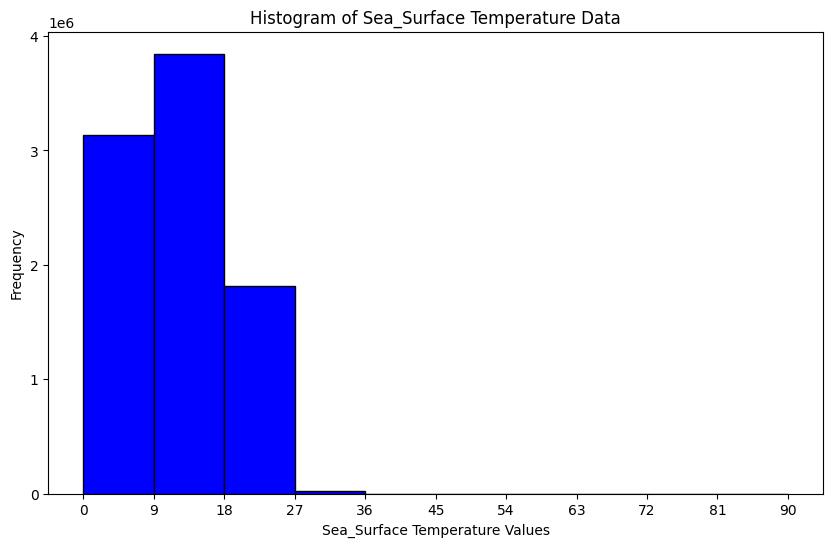

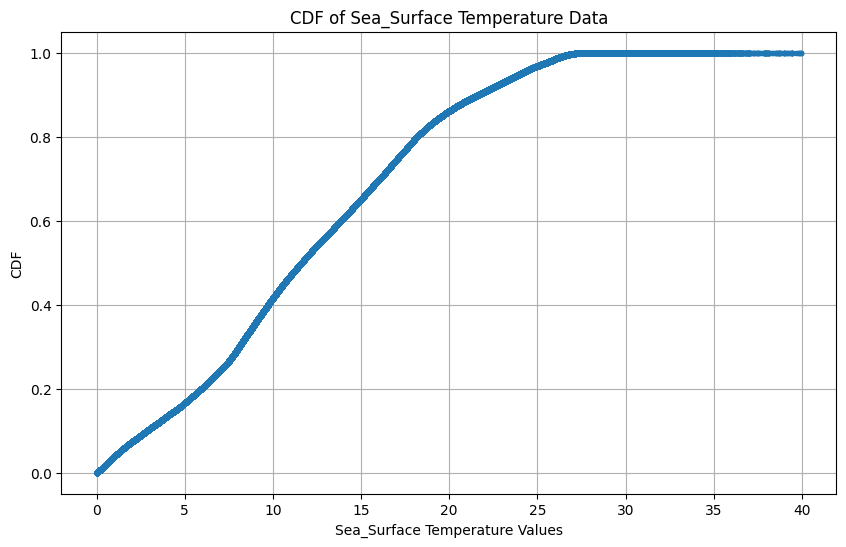


Latitude Band: (30-60)N-(30-60)S
Value Range: (-1, 0)
Valid Pixels: 188244
Fraction Valid wrt local region: 0.02072945562879646
Fraction Valid wrt global region: 0.007813818234708182
Mean: -0.4466474950313568
Standard Deviation: 0.29153692722320557
50th Percentile: -0.41999998688697815
80th Percentile: -0.14999999105930328
90th Percentile: -0.07000000029802322


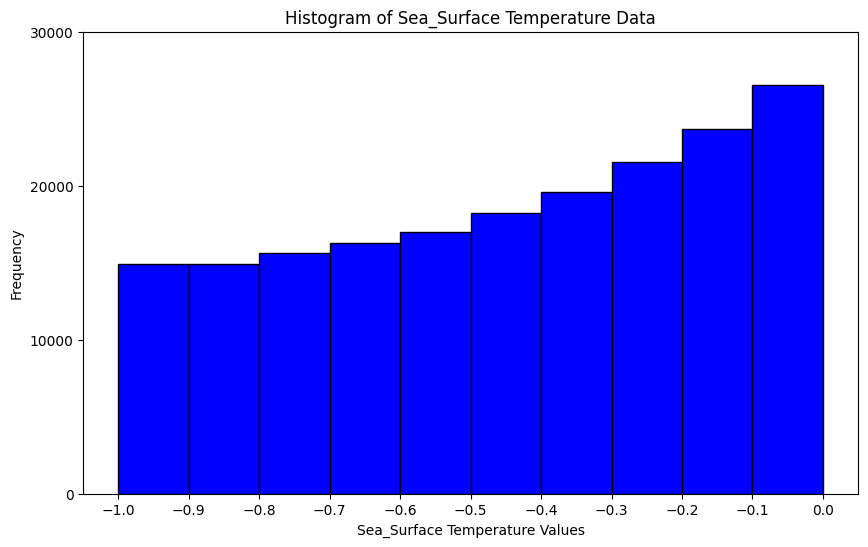

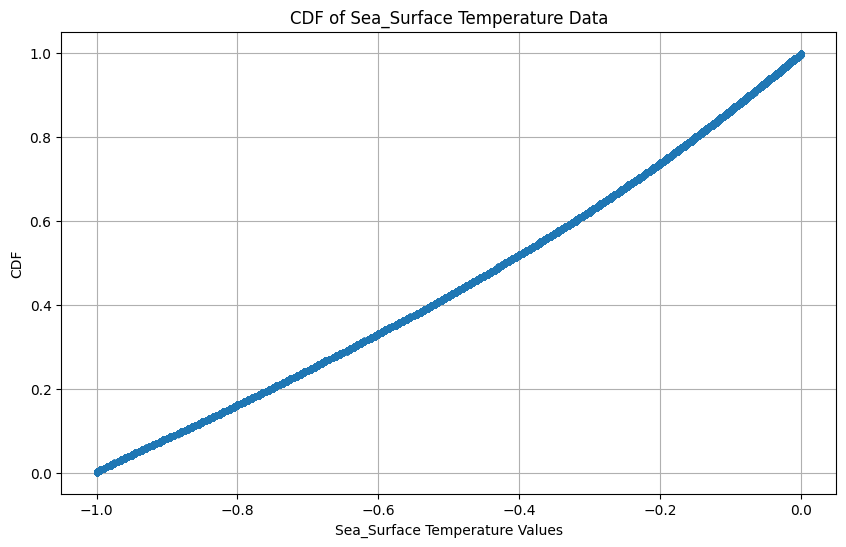


Latitude Band: (30-60)N-(30-60)S
Value Range: (-2, 0)
Valid Pixels: 264575
Fraction Valid wrt local region: 0.029135036032961602
Fraction Valid wrt global region: 0.010982240918424582
Mean: -0.702589750289917
Standard Deviation: 0.48507335782051086
50th Percentile: -0.6399999856948853
80th Percentile: -0.2149999886751175
90th Percentile: -0.09999999403953552


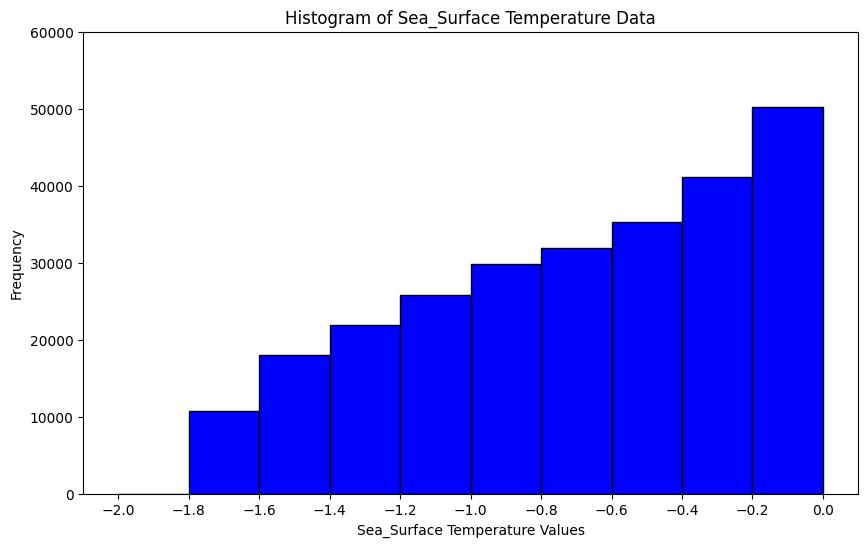

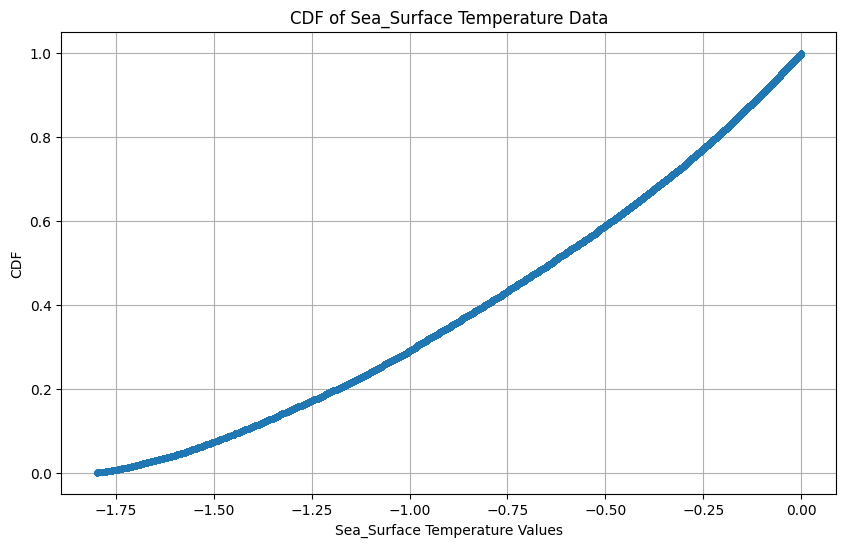


Latitude Band: (60-90)N-(60-90)S
Value Range: (0, 30)
Valid Pixels: 4230392
Fraction Valid wrt local region: 0.741424935753508
Fraction Valid wrt global region: 0.17559929745204955
Mean: 2.8581135272979736
Standard Deviation: 3.326483964920044
50th Percentile: 1.4049999713897705
80th Percentile: 4.994999885559082
90th Percentile: 8.114999771118164


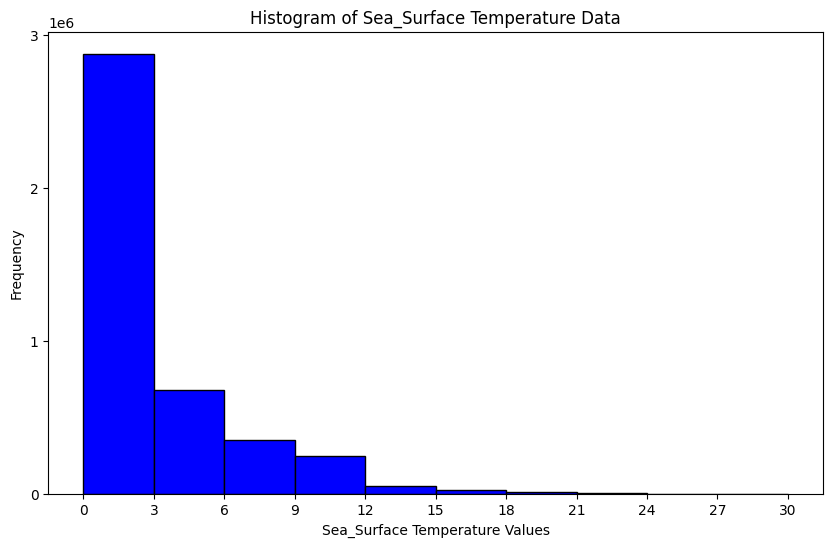

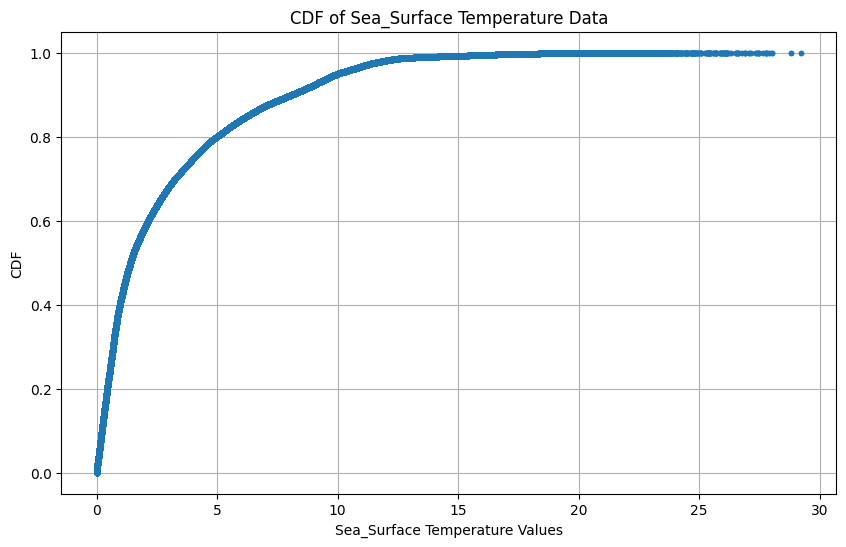


Latitude Band: (60-90)N-(60-90)S
Value Range: (0, 60)
Valid Pixels: 4230397
Fraction Valid wrt local region: 0.7414258120611122
Fraction Valid wrt global region: 0.17559950499699745
Mean: 2.858147621154785
Standard Deviation: 3.3266212940216064
50th Percentile: 1.4049999713897705
80th Percentile: 4.994999885559082
90th Percentile: 8.114999771118164


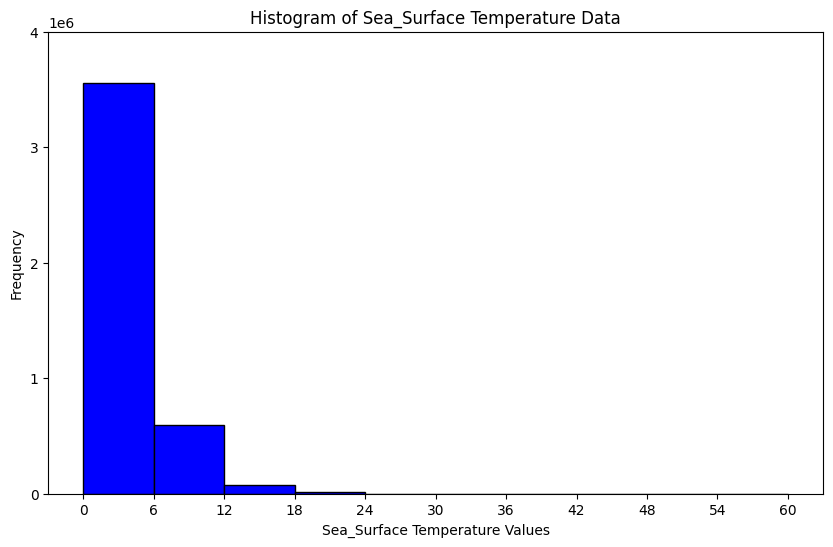

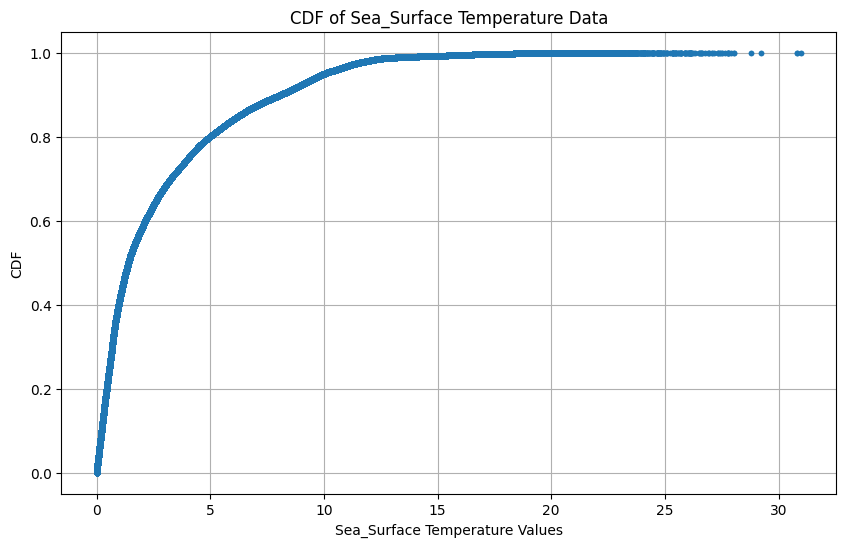


Latitude Band: (60-90)N-(60-90)S
Value Range: (0, 90)
Valid Pixels: 4230397
Fraction Valid wrt local region: 0.7414258120611122
Fraction Valid wrt global region: 0.17559950499699745
Mean: 2.858147621154785
Standard Deviation: 3.3266212940216064
50th Percentile: 1.4049999713897705
80th Percentile: 4.994999885559082
90th Percentile: 8.114999771118164


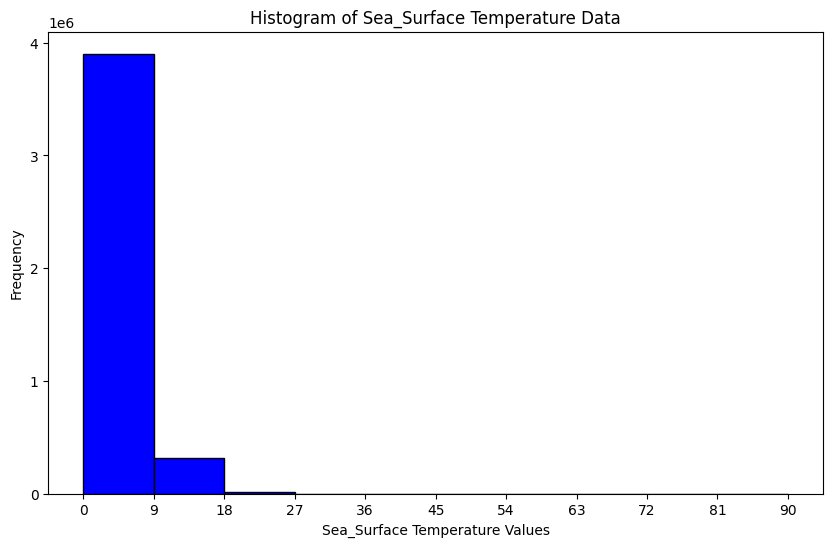

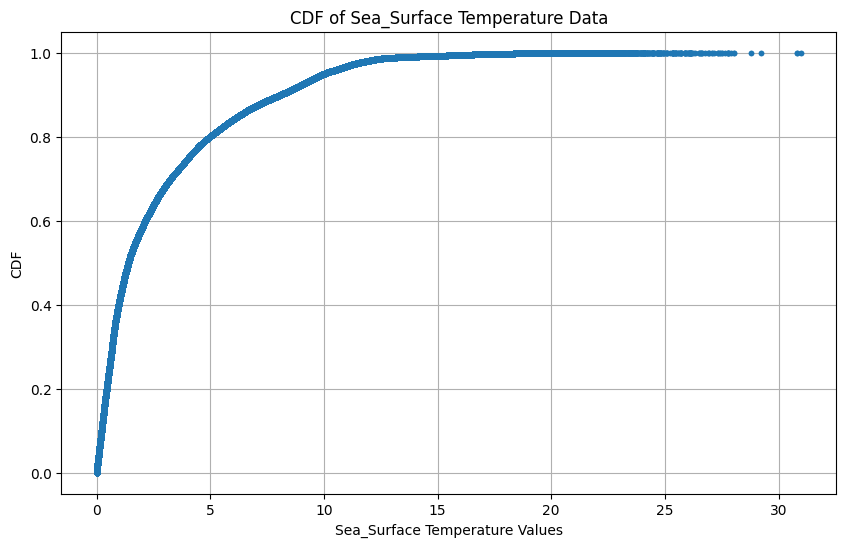


Latitude Band: (60-90)N-(60-90)S
Value Range: (-1, 0)
Valid Pixels: 1238255
Fraction Valid wrt local region: 0.21701845451236199
Fraction Valid wrt global region: 0.05139871389376861
Mean: -0.41354790329933167
Standard Deviation: 0.27580106258392334
50th Percentile: -0.375
80th Percentile: -0.14000000059604645
90th Percentile: -0.06499999761581421


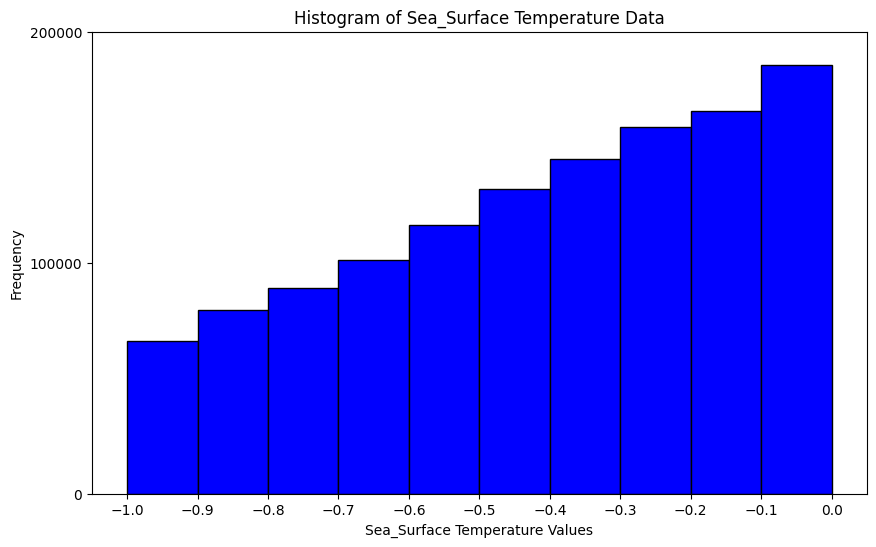

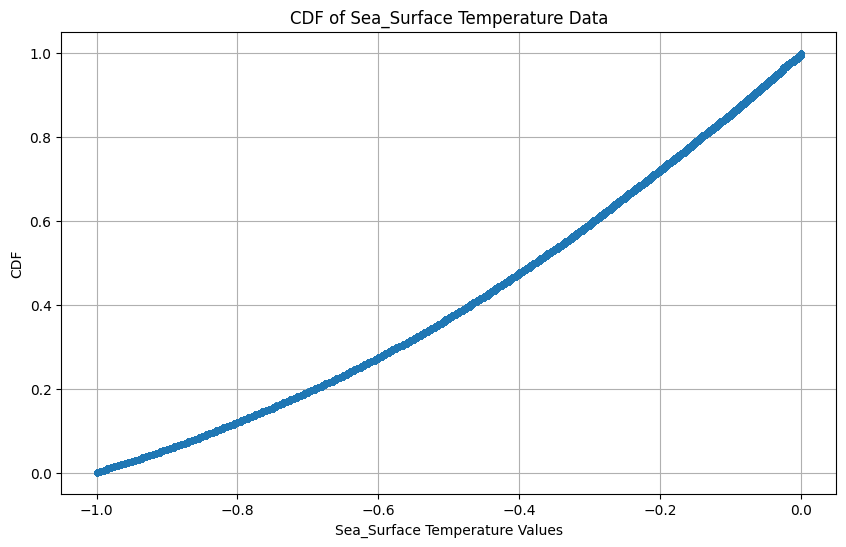


Latitude Band: (60-90)N-(60-90)S
Value Range: (-2, 0)
Valid Pixels: 1484366
Fraction Valid wrt local region: 0.26015224267271014
Fraction Valid wrt global region: 0.061614532828567416
Mean: -0.5645025968551636
Standard Deviation: 0.4318883419036865
50th Percentile: -0.4699999988079071
80th Percentile: -0.17000000178813934
90th Percentile: -0.07999999821186066


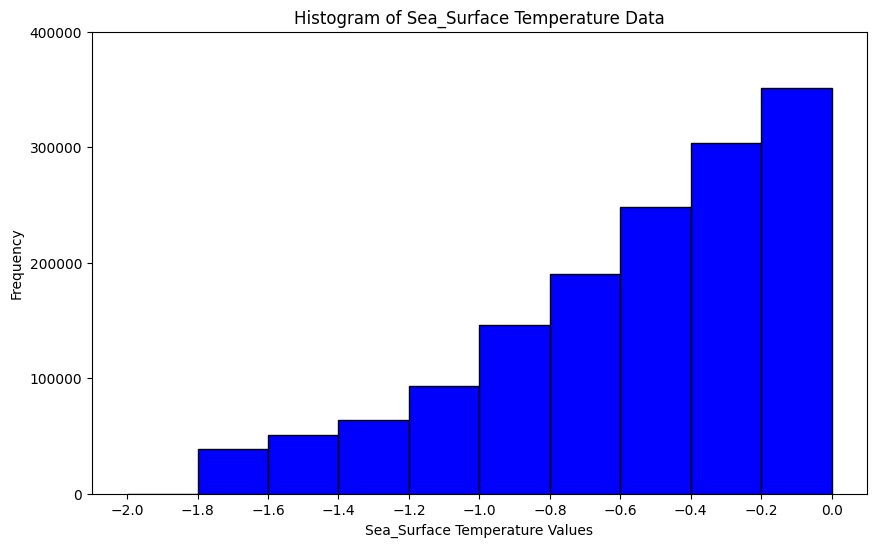

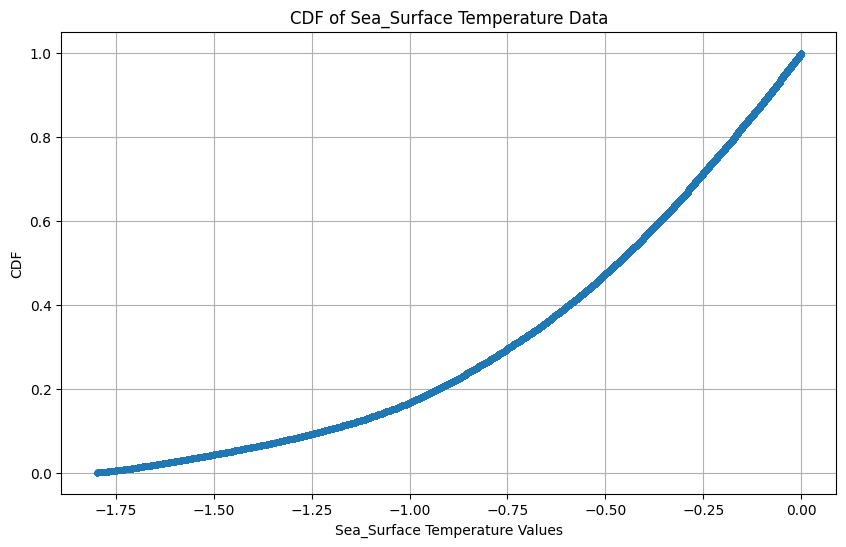

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

def plot_histogram(filtered_data, value_range):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(value_range[0], value_range[1], 11)
    hist, bins, patches = plt.hist(filtered_data, bins=bins, edgecolor='black', color='blue')
    
    plt.xticks(bins)
    
    y_max = max(hist)
    a = 10 ** (len(str(int(y_max))) - 1)
    arr = np.arange(0, y_max + a, a)
    
    plt.yticks(arr)
    
    plt.xlabel('Sea_Surface Temperature Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of Sea_Surface Temperature Data')
    
    plt.show()

def plot_cdf(filtered_data, value_range):
    plt.figure(figsize=(10, 6))
    sorted_data = np.sort(filtered_data)
    
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    plt.plot(sorted_data, cdf, marker='.', linestyle='none')
    
    plt.xlabel('Sea_Surface Temperature Values')
    plt.ylabel('CDF')
    plt.title('CDF of Sea_Surface Temperature Data')
    
    plt.grid(True)
    plt.show()

nc_file = nc.Dataset('AQUA_MODIS.20020101_20021231.L3m.YR.SST.sst.4km.nc', 'r')
sst_data = np.array(nc_file.variables['sst'][:])
fill_value = -32767.0
sst_data = np.where(sst_data == fill_value, np.nan, sst_data)

test_sst_data = sst_data[~np.isnan(sst_data)]

regional_pixels_global = test_sst_data.shape[0]
latitudes = nc_file.variables['lat'][:]
longitudes = nc_file.variables['lon'][:]

nc_file.close()

print("Total Global Pixels",regional_pixels_global)

latitude_bands = {
    "(30-60)N-(30-60)S": ((latitudes >= -60) & (latitudes <= -30)) | ((latitudes >= 30) & (latitudes <= 60)),
    "(60-90)N-(60-90)S": ((latitudes >= -90) & (latitudes <= -60)) | ((latitudes >= 60) & (latitudes <= 90))
}

value_ranges = [
    (0, 30), (0, 60), (0, 90), (-1, 0), (-2, 0)
]

def calculate_metrics(filtered_data):
    mean_value = np.nanmean(filtered_data)
    std_dev = np.nanstd(filtered_data)
    percentiles = np.nanpercentile(filtered_data, [50, 80, 90])
    return mean_value, std_dev, percentiles

for band_name, band_filter in latitude_bands.items():
    band_lat_indices = np.where(band_filter)[0]
    filtered_data = sst_data[band_lat_indices, :]
    filtered_data = filtered_data[~np.isnan(filtered_data)]

    for value_range in value_ranges:
        range_filter = (filtered_data >= value_range[0]) & (filtered_data <= value_range[1])
        filtered_values = filtered_data[range_filter]
        regional_pixels_local=filtered_data.shape[0]
        valid_pixels = filtered_values.shape[0]
        Fraction_Valid_local = valid_pixels / regional_pixels_local
        Fraction_Valid_global = valid_pixels / regional_pixels_global
        
        if valid_pixels > 0:
            mean_value, std_dev, percentiles = calculate_metrics(filtered_values)
            print(f"\nLatitude Band: {band_name}")
            print(f"Value Range: {value_range}")
            print(f"Valid Pixels: {valid_pixels}")
            print(f"Fraction Valid wrt local region: {Fraction_Valid_local}")
            print(f"Fraction Valid wrt global region: {Fraction_Valid_global}")
            print(f"Mean: {mean_value}")
            print(f"Standard Deviation: {std_dev}")
            print(f"50th Percentile: {percentiles[0]}")
            print(f"80th Percentile: {percentiles[1]}")
            print(f"90th Percentile: {percentiles[2]}")
            plot_histogram(filtered_values, value_range)
            plot_cdf(filtered_values, value_range)
        else:
            print(f"\nLatitude Band: {band_name}")
            print(f"Value Range: {value_range}")
            print("No data in this range.")


Total Global Pixels 24091167

Latitude Band: 30N-30S
Value Range: (0, 30)
Valid Pixels: 8936940
Fraction Valid wrt local region: 0.9605051020391713
Fraction Valid wrt global region: 0.3709633493470864
Mean: 25.879737854003906
Standard Deviation: 2.999615430831909
50th Percentile: 26.709999084472656
80th Percentile: 28.474998474121094
90th Percentile: 29.125


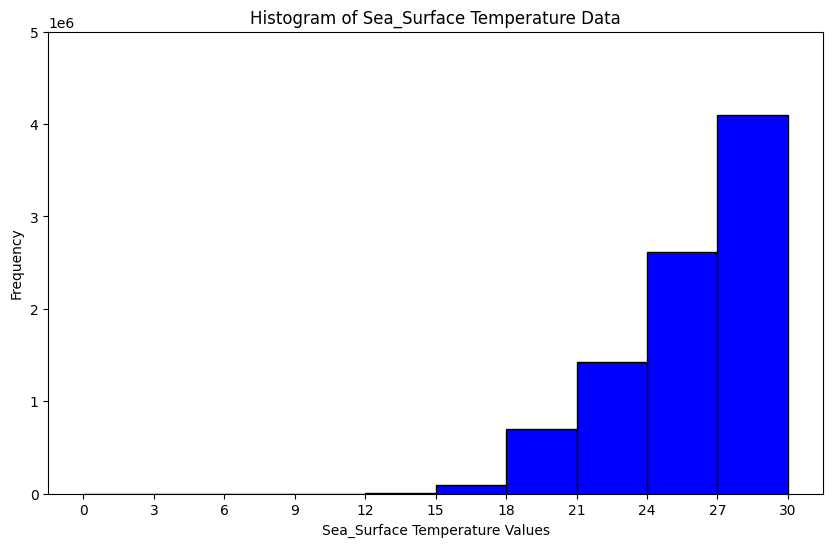

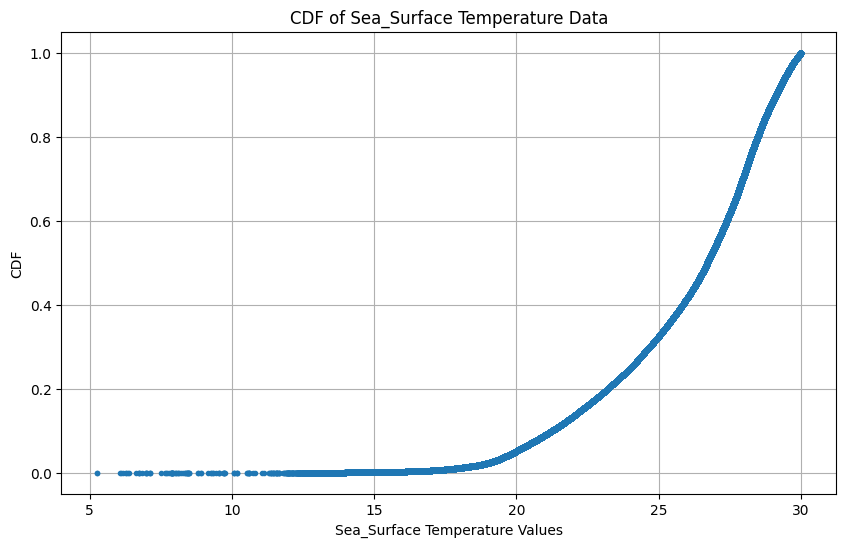


Latitude Band: 30N-30S
Value Range: (0, 60)
Valid Pixels: 9304417
Fraction Valid wrt local region: 1.0
Fraction Valid wrt global region: 0.3862169483113873
Mean: 26.057117462158203
Standard Deviation: 3.0693111419677734
50th Percentile: 26.854999542236328
80th Percentile: 28.66499900817871
90th Percentile: 29.404998779296875


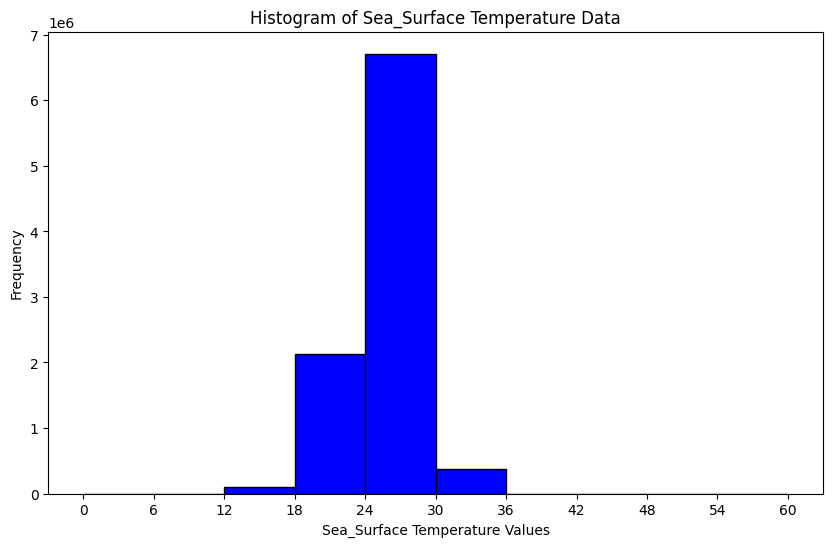

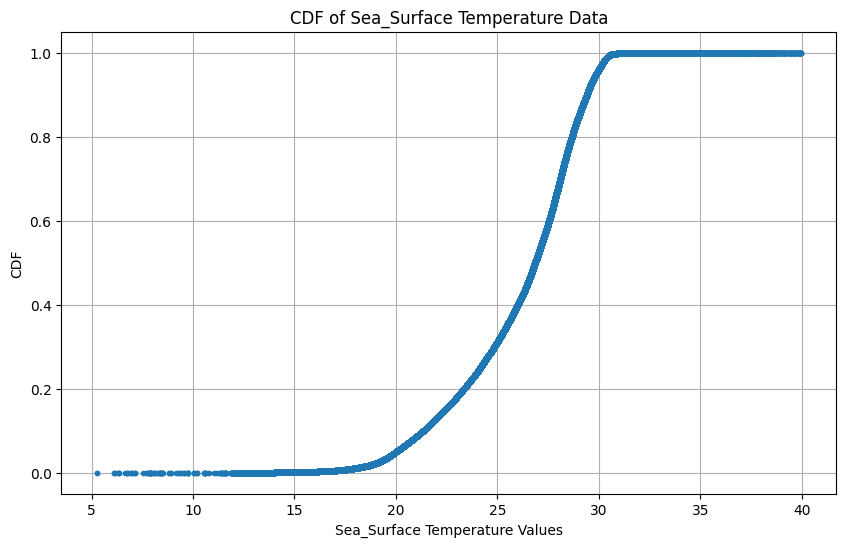


Latitude Band: 30N-30S
Value Range: (0, 90)
Valid Pixels: 9304417
Fraction Valid wrt local region: 1.0
Fraction Valid wrt global region: 0.3862169483113873
Mean: 26.057117462158203
Standard Deviation: 3.0693111419677734
50th Percentile: 26.854999542236328
80th Percentile: 28.66499900817871
90th Percentile: 29.404998779296875


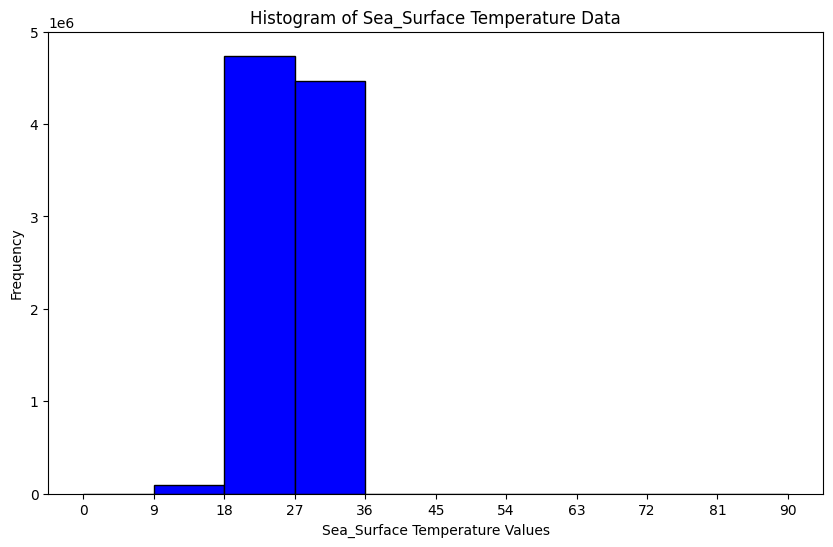

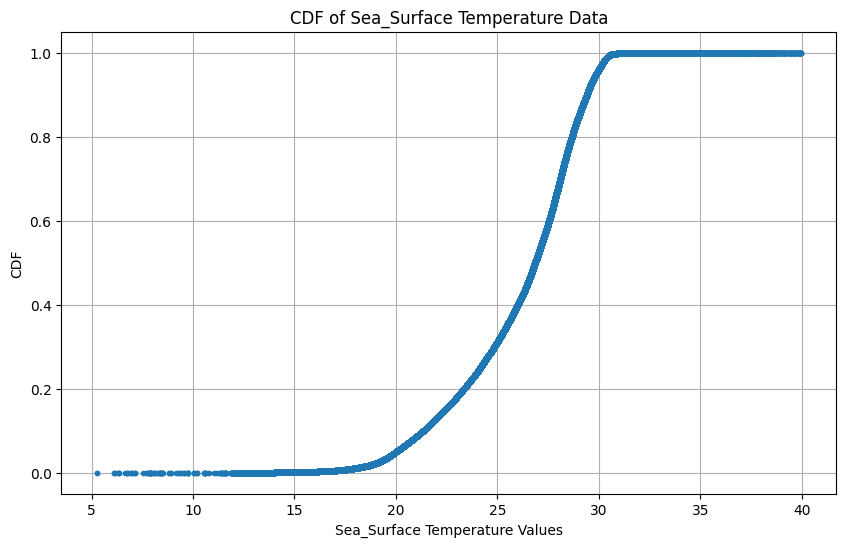


Latitude Band: 30N-30S
Value Range: (-1, 0)
No data in this range.

Latitude Band: 30N-30S
Value Range: (-2, 0)
No data in this range.

Latitude Band: 60N-60S
Value Range: (0, 30)
Valid Pixels: 17750376
Fraction Valid wrt local region: 0.9654599995822775
Fraction Valid wrt global region: 0.7368001724449463
Mean: 19.047643661499023
Standard Deviation: 8.625535011291504
50th Percentile: 21.479999542236328
80th Percentile: 27.41499900817871
90th Percentile: 28.48499870300293


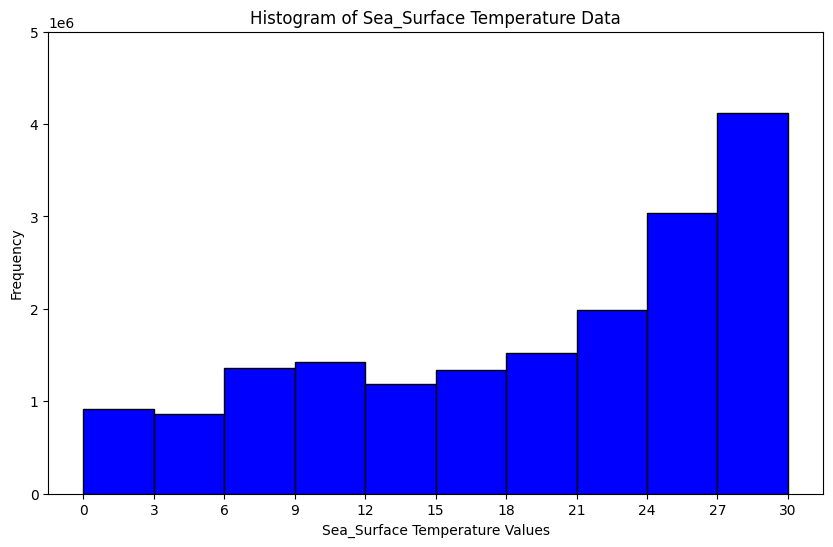

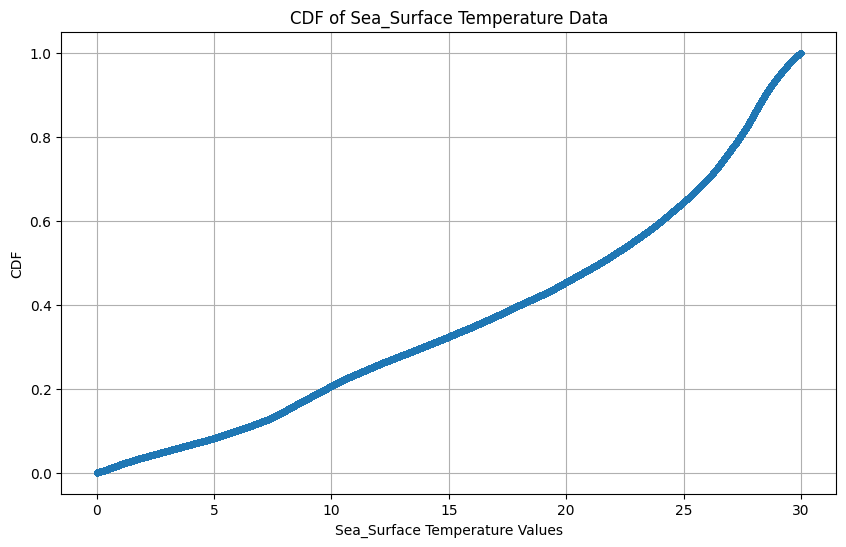


Latitude Band: 60N-60S
Value Range: (0, 60)
Valid Pixels: 18122143
Fraction Valid wrt local region: 0.985680763788326
Fraction Valid wrt global region: 0.7522318449745502
Mean: 19.280353546142578
Standard Deviation: 8.68724250793457
50th Percentile: 21.779998779296875
80th Percentile: 27.614999771118164
90th Percentile: 28.704999923706055


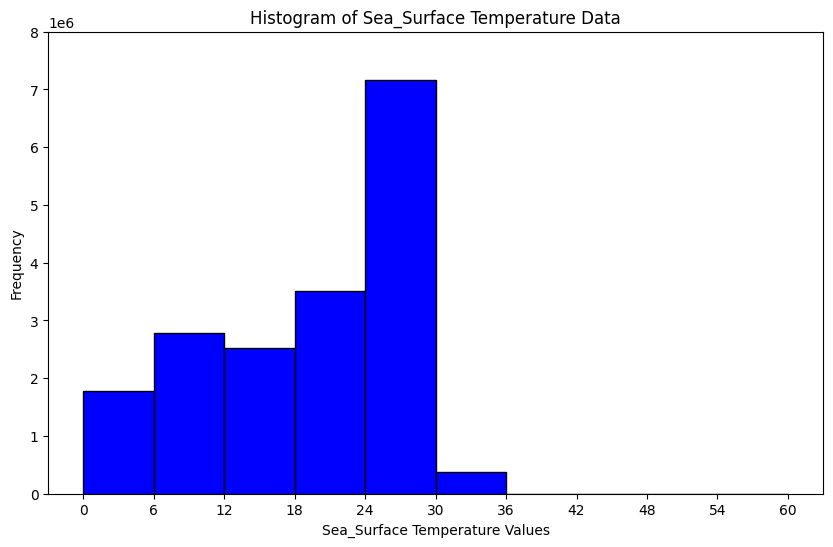

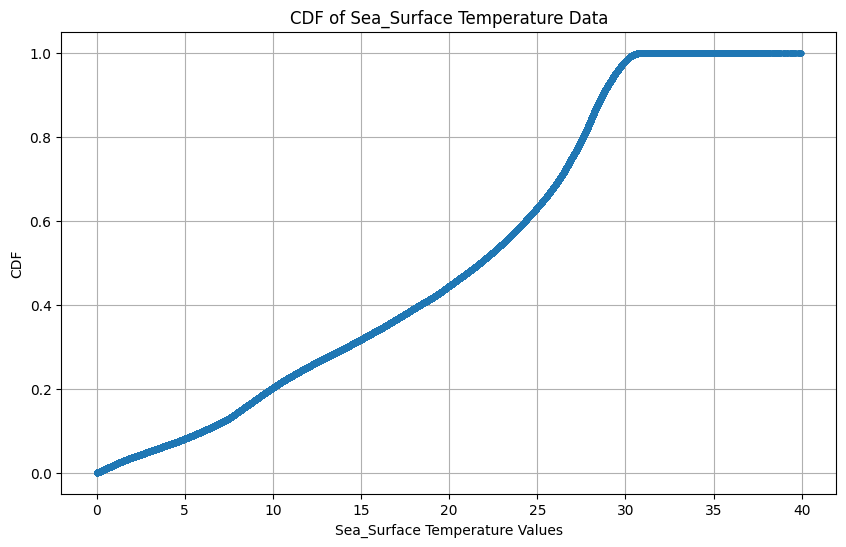


Latitude Band: 60N-60S
Value Range: (0, 90)
Valid Pixels: 18122143
Fraction Valid wrt local region: 0.985680763788326
Fraction Valid wrt global region: 0.7522318449745502
Mean: 19.280353546142578
Standard Deviation: 8.68724250793457
50th Percentile: 21.779998779296875
80th Percentile: 27.614999771118164
90th Percentile: 28.704999923706055


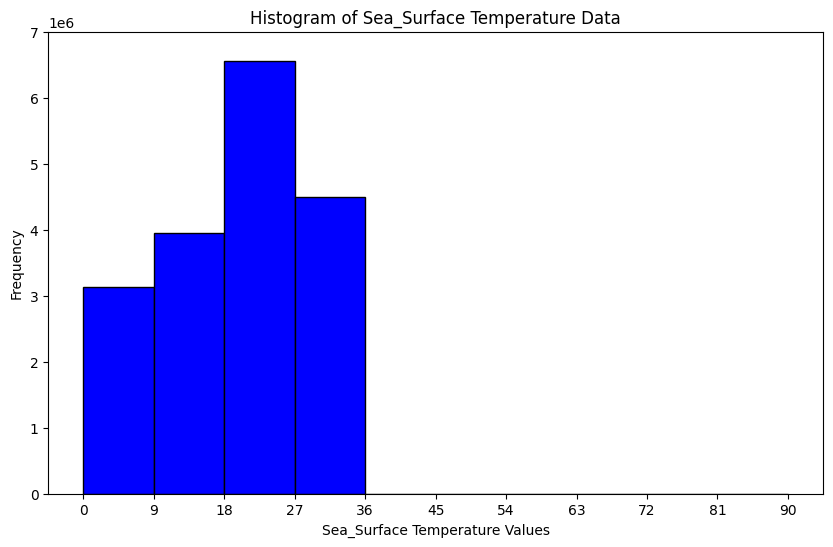

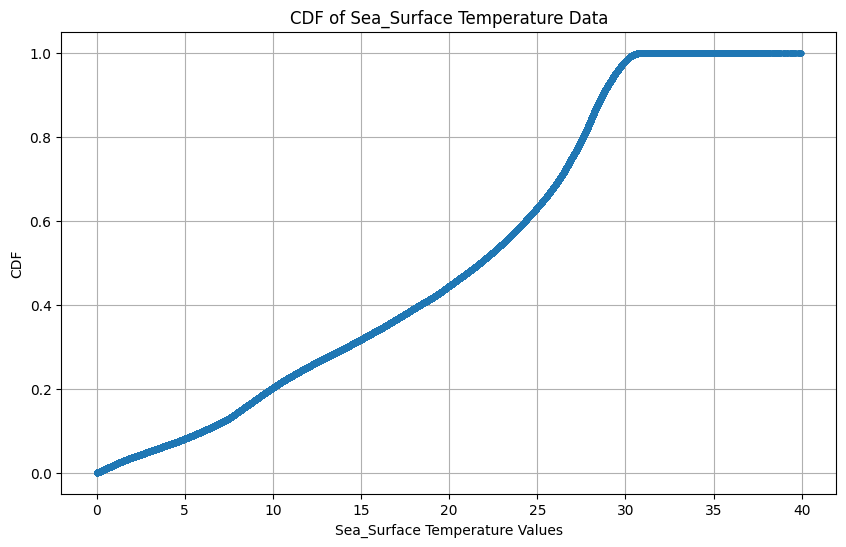


Latitude Band: 60N-60S
Value Range: (-1, 0)
Valid Pixels: 188244
Fraction Valid wrt local region: 0.010238771965245481
Fraction Valid wrt global region: 0.007813818234708182
Mean: -0.4466474950313568
Standard Deviation: 0.29153692722320557
50th Percentile: -0.41999998688697815
80th Percentile: -0.14999999105930328
90th Percentile: -0.07000000029802322


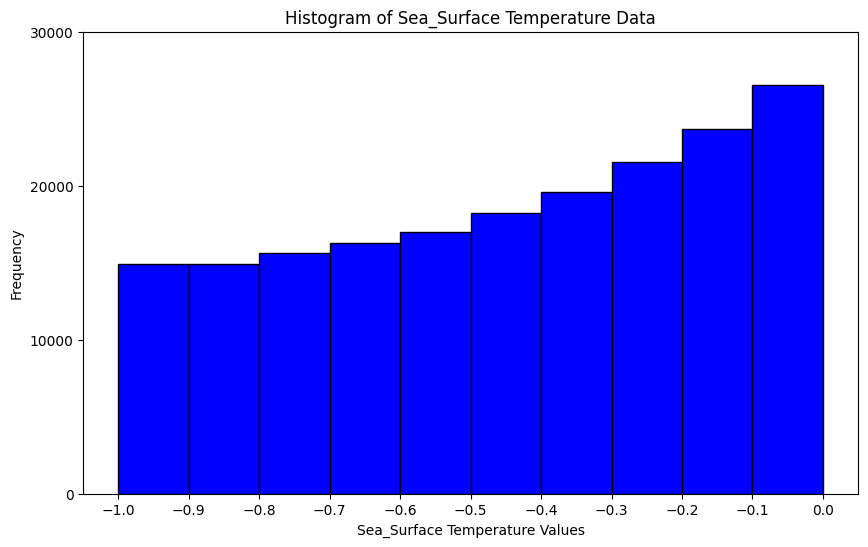

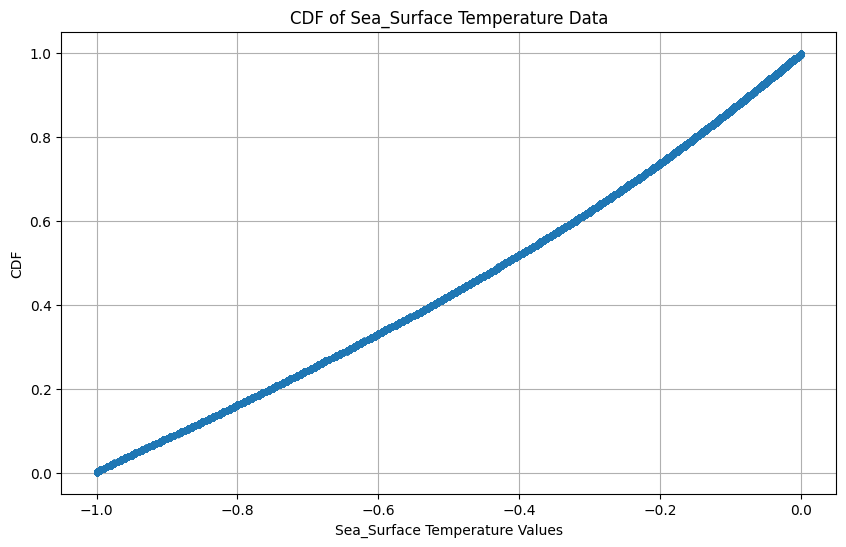


Latitude Band: 60N-60S
Value Range: (-2, 0)
Valid Pixels: 264575
Fraction Valid wrt local region: 0.014390488369907266
Fraction Valid wrt global region: 0.010982240918424582
Mean: -0.702589750289917
Standard Deviation: 0.48507335782051086
50th Percentile: -0.6399999856948853
80th Percentile: -0.2149999886751175
90th Percentile: -0.09999999403953552


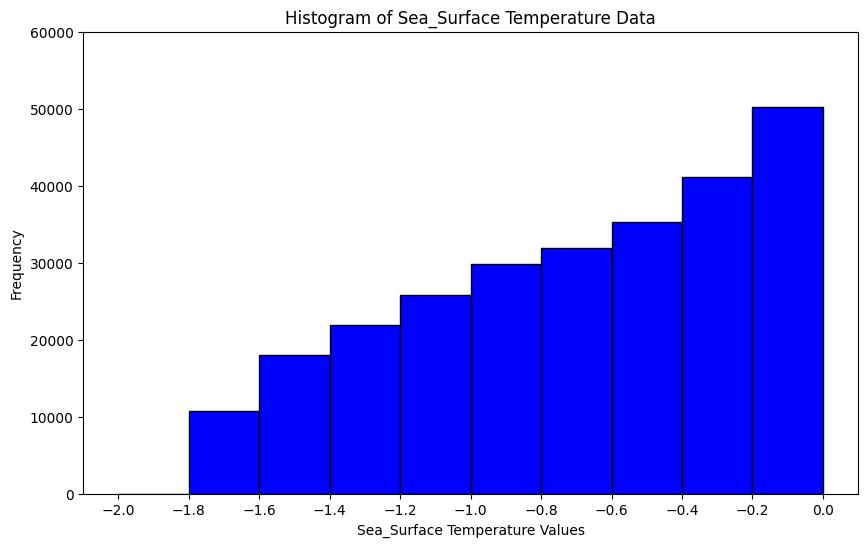

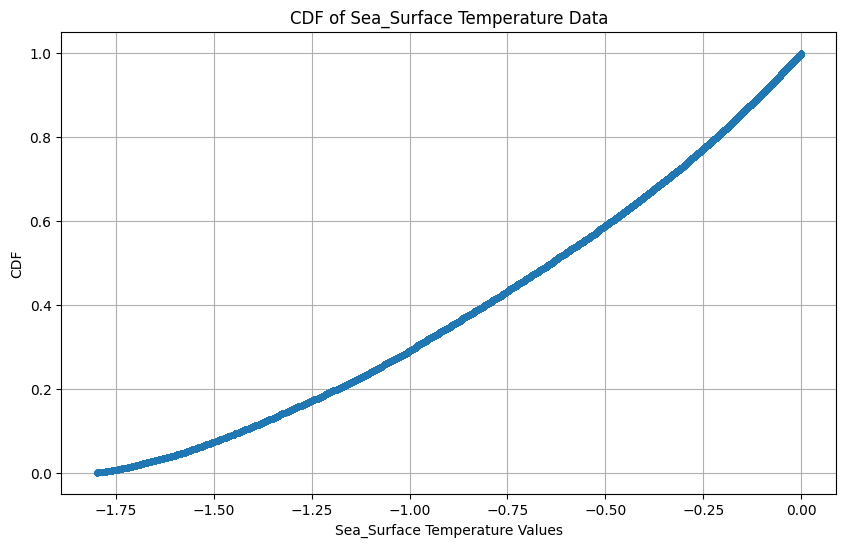


Latitude Band: 90N-90S
Value Range: (0, 30)
Valid Pixels: 21980768
Fraction Valid wrt local region: 0.9123994698969958
Fraction Valid wrt global region: 0.9123994698969958
Mean: 15.931806564331055
Standard Deviation: 10.146228790283203
50th Percentile: 17.364999771118164
80th Percentile: 26.795000076293945
90th Percentile: 28.224998474121094


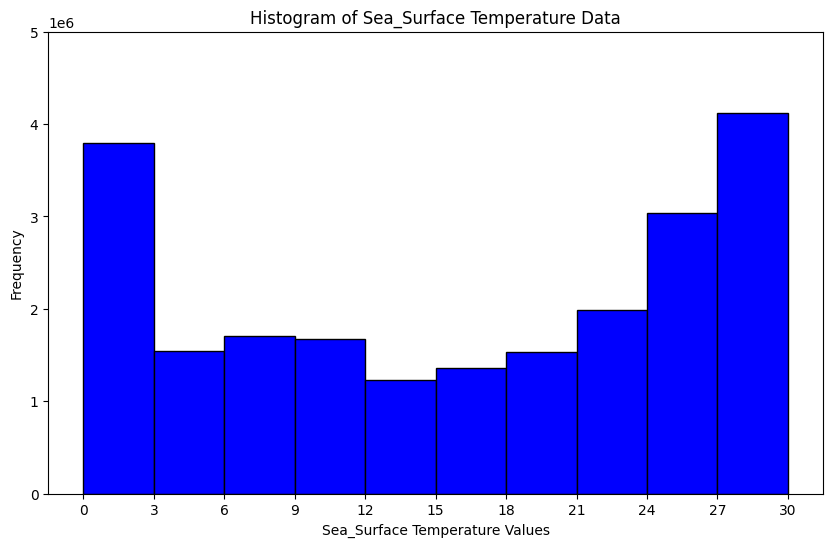

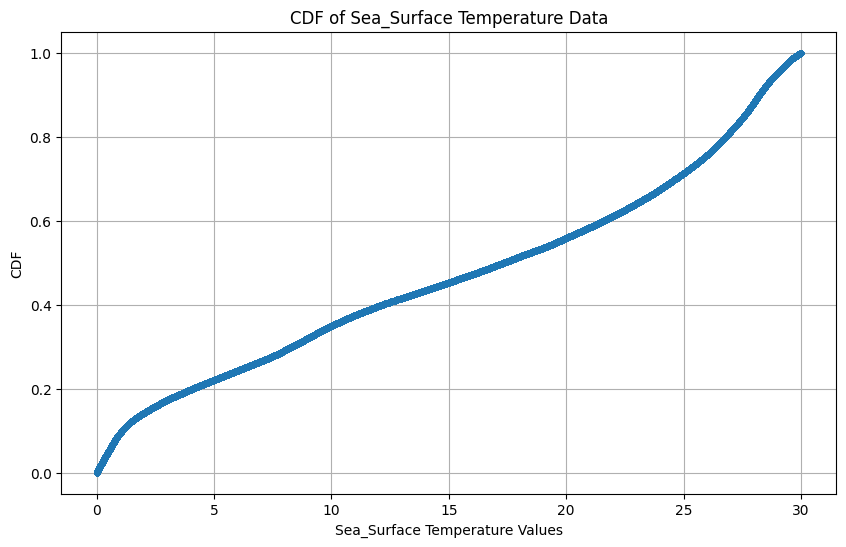


Latitude Band: 90N-90S
Value Range: (0, 60)
Valid Pixels: 22352540
Fraction Valid wrt local region: 0.9278313499715477
Fraction Valid wrt global region: 0.9278313499715477
Mean: 16.17231559753418
Standard Deviation: 10.230380058288574
50th Percentile: 17.75
80th Percentile: 27.014999389648438
90th Percentile: 28.424999237060547


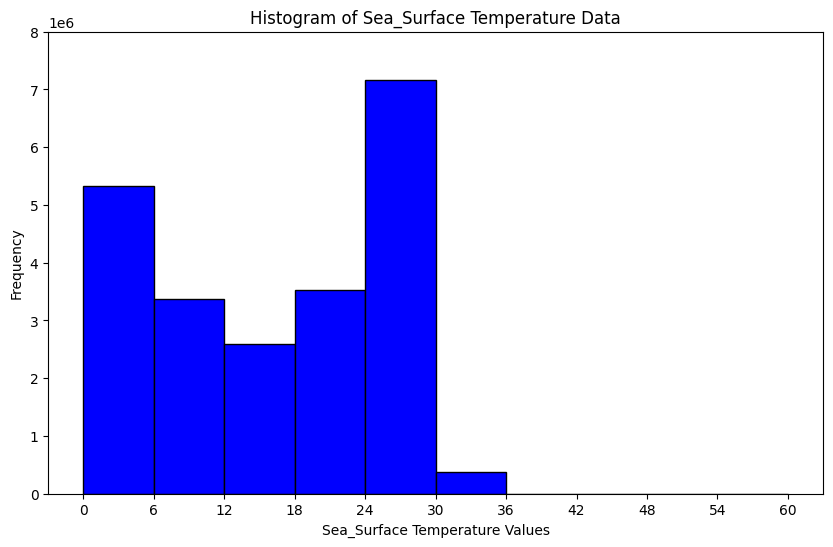

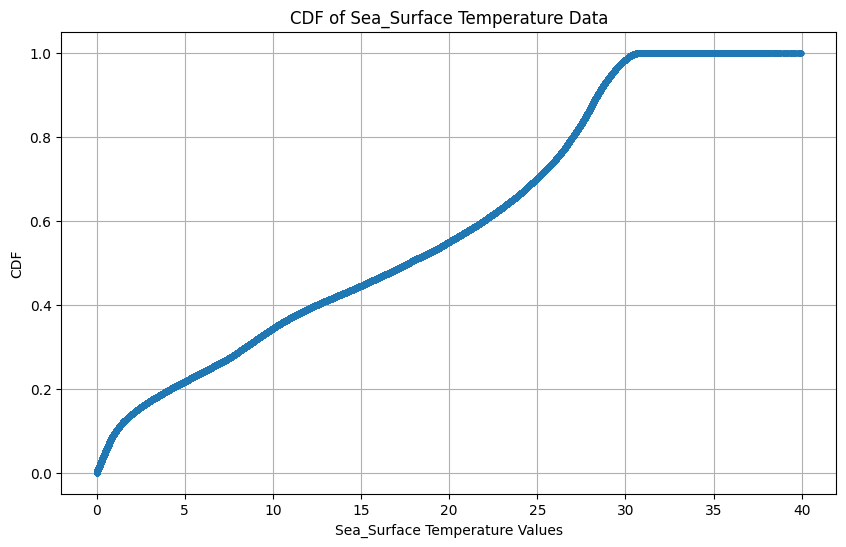


Latitude Band: 90N-90S
Value Range: (0, 90)
Valid Pixels: 22352540
Fraction Valid wrt local region: 0.9278313499715477
Fraction Valid wrt global region: 0.9278313499715477
Mean: 16.17231559753418
Standard Deviation: 10.230380058288574
50th Percentile: 17.75
80th Percentile: 27.014999389648438
90th Percentile: 28.424999237060547


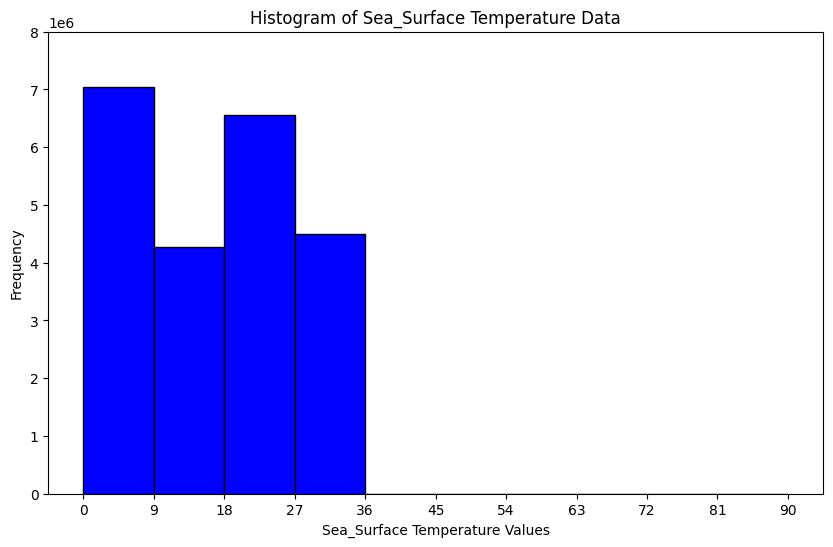

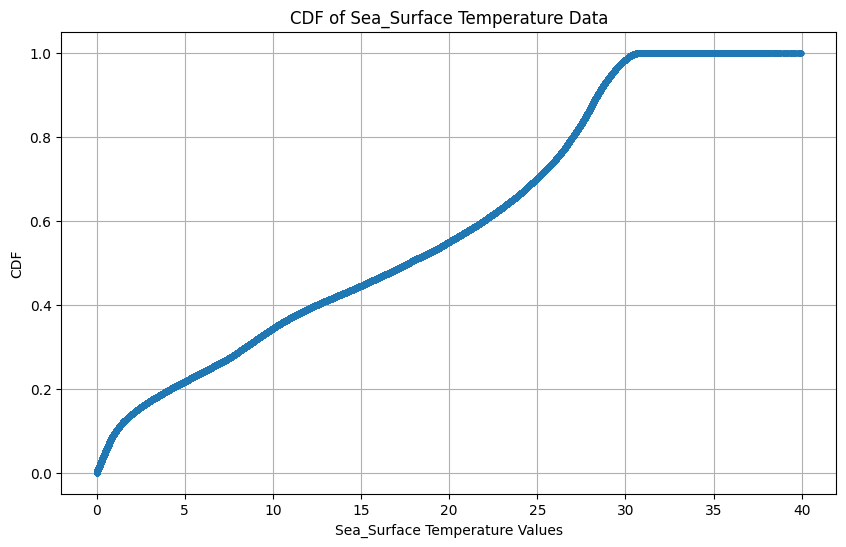


Latitude Band: 90N-90S
Value Range: (-1, 0)
Valid Pixels: 1426499
Fraction Valid wrt local region: 0.0592125321284768
Fraction Valid wrt global region: 0.0592125321284768
Mean: -0.417915940284729
Standard Deviation: 0.2781543433666229
50th Percentile: -0.3799999952316284
80th Percentile: -0.14000000059604645
90th Percentile: -0.07000000029802322


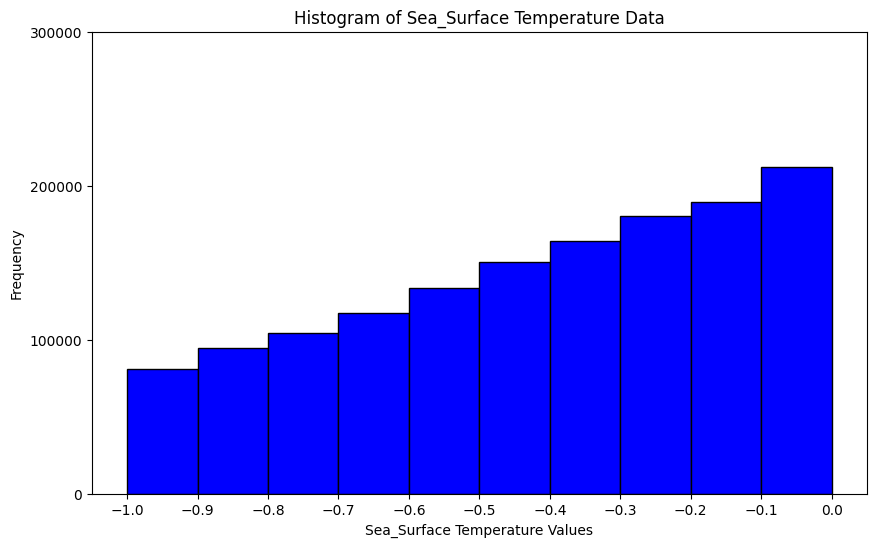

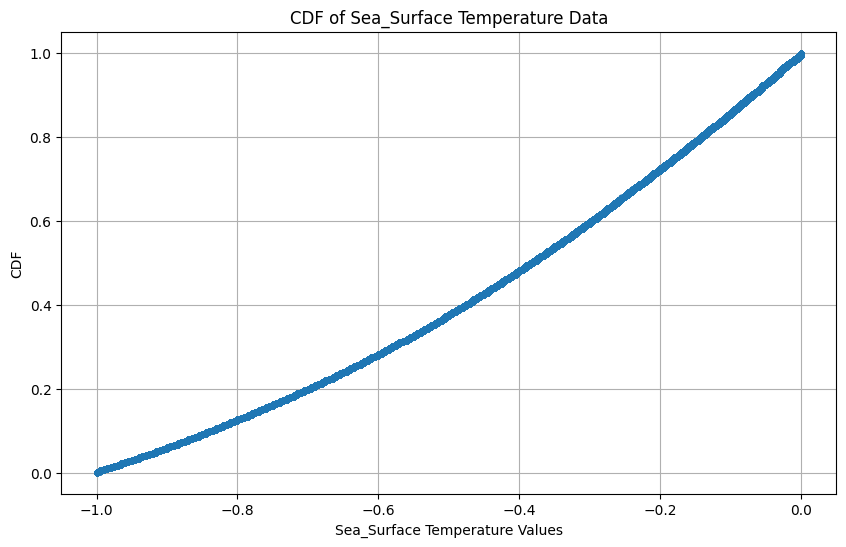


Latitude Band: 90N-90S
Value Range: (-2, 0)
Valid Pixels: 1748941
Fraction Valid wrt local region: 0.072596773746992
Fraction Valid wrt global region: 0.072596773746992
Mean: -0.5853921175003052
Standard Deviation: 0.443117618560791
50th Percentile: -0.4899999797344208
80th Percentile: -0.17499999701976776
90th Percentile: -0.08500000089406967


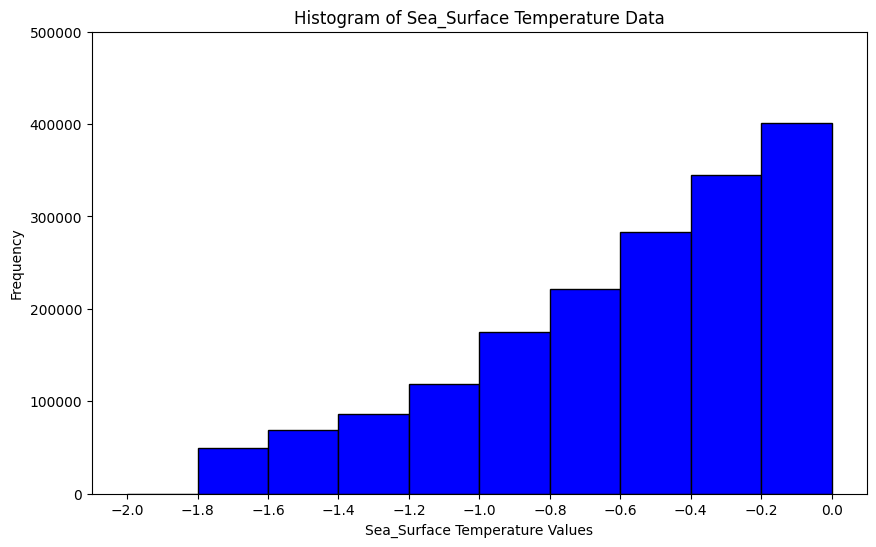

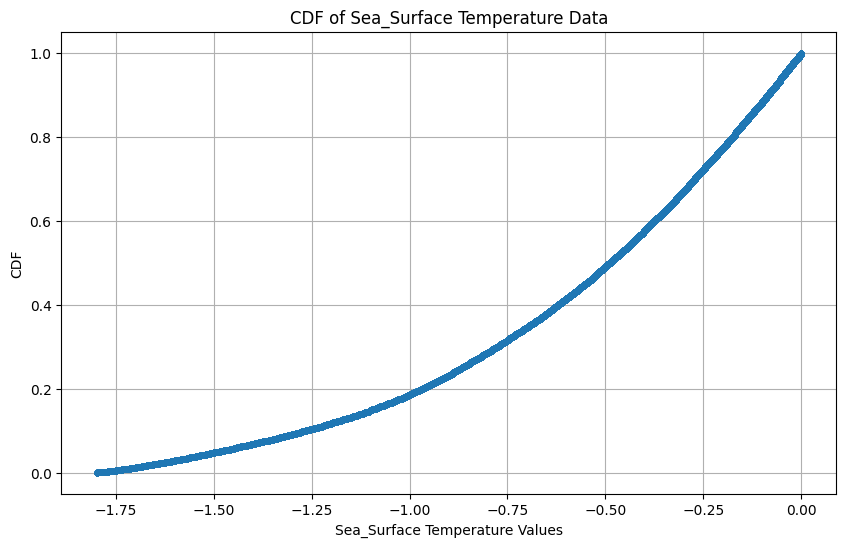

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

def plot_histogram(filtered_data, value_range):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(value_range[0], value_range[1], 11)
    hist, bins, patches = plt.hist(filtered_data, bins=bins, edgecolor='black', color='blue')
    
    plt.xticks(bins)
    
    y_max = max(hist)
    a = 10 ** (len(str(int(y_max))) - 1)
    arr = np.arange(0, y_max + a, a)
    
    plt.yticks(arr)
    
    plt.xlabel('Sea_Surface Temperature Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of Sea_Surface Temperature Data')
    
    plt.show()

def plot_cdf(filtered_data, value_range):
    plt.figure(figsize=(10, 6))
    sorted_data = np.sort(filtered_data)
    
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    plt.plot(sorted_data, cdf, marker='.', linestyle='none')
    
    plt.xlabel('Sea_Surface Temperature Values')
    plt.ylabel('CDF')
    plt.title('CDF of Sea_Surface Temperature Data')
    
    plt.grid(True)
    plt.show()

nc_file = nc.Dataset('AQUA_MODIS.20020101_20021231.L3m.YR.SST.sst.4km.nc', 'r')
sst_data = np.array(nc_file.variables['sst'][:])
fill_value = -32767.0
sst_data = np.where(sst_data == fill_value, np.nan, sst_data)

test_sst_data = sst_data[~np.isnan(sst_data)]

regional_pixels_global = test_sst_data.shape[0]
latitudes = nc_file.variables['lat'][:]
longitudes = nc_file.variables['lon'][:]

nc_file.close()

print("Total Global Pixels",regional_pixels_global)

latitude_bands = {
    "30N-30S": (latitudes >= -30) & (latitudes <= 30),
    "60N-60S": (latitudes >= -60) & (latitudes <= 60),
    "90N-90S": np.full_like(latitudes, True, dtype=bool),
    #"(30-60)N-(30-60)S": ((latitudes >= -60) & (latitudes <= -30)) | ((latitudes >= 30) & (latitudes <= 60)),
    #"(60-90)N-(60-90)S": ((latitudes >= -90) & (latitudes <= -60)) | ((latitudes >= 60) & (latitudes <= 90))
}

value_ranges = [
    (0, 30), (0, 60), (0, 90), (-1,0), (-2, 0)
]

def calculate_metrics(filtered_data):
    mean_value = np.nanmean(filtered_data)
    std_dev = np.nanstd(filtered_data)
    percentiles = np.nanpercentile(filtered_data, [50, 80, 90])
    return mean_value, std_dev, percentiles

for band_name, band_filter in latitude_bands.items():
    band_lat_indices = np.where(band_filter)[0]
    filtered_data = sst_data[band_lat_indices, :]
    filtered_data = filtered_data[~np.isnan(filtered_data)]

    for value_range in value_ranges:
        range_filter = (filtered_data >= value_range[0]) & (filtered_data <= value_range[1])
        filtered_values = filtered_data[range_filter]
        regional_pixels_local=filtered_data.shape[0]
        valid_pixels = filtered_values.shape[0]
        Fraction_Valid_local = valid_pixels / regional_pixels_local
        Fraction_Valid_global = valid_pixels / regional_pixels_global
        
        if valid_pixels > 0:
            mean_value, std_dev, percentiles = calculate_metrics(filtered_values)
            print(f"\nLatitude Band: {band_name}")
            print(f"Value Range: {value_range}")
            print(f"Valid Pixels: {valid_pixels}")
            print(f"Fraction Valid wrt local region: {Fraction_Valid_local}")
            print(f"Fraction Valid wrt global region: {Fraction_Valid_global}")
            print(f"Mean: {mean_value}")
            print(f"Standard Deviation: {std_dev}")
            print(f"50th Percentile: {percentiles[0]}")
            print(f"80th Percentile: {percentiles[1]}")
            print(f"90th Percentile: {percentiles[2]}")
            plot_histogram(filtered_values, value_range)
            plot_cdf(filtered_values, value_range)
        else:
            print(f"\nLatitude Band: {band_name}")
            print(f"Value Range: {value_range}")
            print("No data in this range.")


In [2]:
import netCDF4 as nc

dataset = nc.Dataset('AQUA_MODIS.20020101_20021231.L3m.YR.SST.sst.4km.nc')

print("Variables in the dataset:")
print(dataset.variables.keys())

i=1

for var_name in dataset.variables:
    print(" data no. ::",i,"\n")
    i+=1
    var = dataset.variables[var_name]
    print(f"Variable: {var_name}")
    print(f"Dimensions: {var.dimensions}")
    print(f"Shape: {var.shape}")
    print(f"Attributes:")
    for attr_name in var.ncattrs():
        print(f"  {attr_name}: {getattr(var, attr_name)}")
    print()

dataset.close()

Variables in the dataset:
dict_keys(['sst', 'qual_sst', 'lat', 'lon', 'palette'])
 data no. :: 1 

Variable: sst
Dimensions: ('lat', 'lon')
Shape: (4320, 8640)
Attributes:
  long_name: Sea Surface Temperature
  scale_factor: 0.004999999888241291
  add_offset: 0.0
  units: degree_C
  standard_name: sea_surface_temperature
  _FillValue: -32767
  valid_min: -1000
  valid_max: 10000
  display_scale: linear
  display_min: -2.0
  display_max: 45.0

 data no. :: 2 

Variable: qual_sst
Dimensions: ('lat', 'lon')
Shape: (4320, 8640)
Attributes:
  long_name: Quality Levels, Sea Surface Temperature
  _FillValue: 255
  valid_min: 0
  valid_max: 5

 data no. :: 3 

Variable: lat
Dimensions: ('lat',)
Shape: (4320,)
Attributes:
  long_name: Latitude
  units: degrees_north
  standard_name: latitude
  _FillValue: -999.0
  valid_min: -90.0
  valid_max: 90.0

 data no. :: 4 

Variable: lon
Dimensions: ('lon',)
Shape: (8640,)
Attributes:
  long_name: Longitude
  units: degrees_east
  standard_name: longit